## EA run comparison

Read all experiment data:

In [54]:
import os
import pandas as pd
import glob
import re

run_directory_prefix = "../models/NarxModelSearch/runs/"
file_name_pattern = "*Runs.csv"
columns = ["datetime", "iteration", "island", "cvMseMean", "cvMseStd", "cvSmapeMean", "cvSmapeStd", "holdoutRmse", "holdoutSmape", "holdoutMape", "holdoutMse", "holdoutIoa", "full_parameters"]

experiment_directories = ["18CellularAutomata3DGrid3x3x3_5AgentsO3_1994-2018_16_stations_calendar", 
                          "18CellularAutomata3DGrid3x3x3_20AgentsO3_1994-2018_16_stations_calendar", 
                          "18Islands20AgentsO3_1994-2018_16_stations_calendar", 
                          "18Islands5AgentsO3_1994-2018_16_stations_calendar",
                          "18CellularAutomata3DGrid3x3x3_5AgentsPM10_1994-2018_16_stations_calendar",
                          "18Islands20AgentsPM10_1994-2018_16_stations_calendar",
                          "18Islands5AgentsPM10_1994-2018_16_stations_calendar"
                         ]

run_directories = []
for experiment_directory in experiment_directories:
    new_run_directory = run_directory_prefix + experiment_directory + "/"
#     print("new_run_directory:", new_run_directory)
    run_directories.append(new_run_directory)

worker_directories = ["local", "TX2"]

# print(run_directories)

dirs_list = []
for run_directory in run_directories:
    dirs_list.append(os.listdir(run_directory))
#     print("dirs:", os.listdir(run_directory))
    
for dirs in dirs_list:
    for item in dirs:
        if item not in worker_directories:
            sub_items = os.listdir(run_directories[0] + item)
            for sub_item in sub_items:
                sub_path = item +"/" + sub_item
#                 print("sub_path:", item +"/" + sub_item)
                worker_directories.append(sub_path)
            
# print("worker_directories:", worker_directories)

paths = []
for run_directory in run_directories:
    for worker_directory in worker_directories:
        experiment = ""
        if run_directory.startswith(run_directory_prefix):
            experiment = run_directory[len(run_directory_prefix):-1]
#         print("experiment:", experiment)
        paths.append((run_directory + worker_directory + "/logs/", worker_directory, experiment))

# print(len(paths))
    
frames = []
for path in paths:
    for csv_file_path in glob.glob(path[0] + file_name_pattern):
#         print("csv_file_path:", csv_file_path)
#         print("csv_file     :", csv_file)
        df = pd.read_csv(csv_file_path, names=columns, engine="python", index_col="datetime", parse_dates=True)
    
        if "EC2" in path[1]:  # EC2 -> + 1 hour (Ireland)
            df.index = df.index + 3600
        if "TX2" in path[1]:  # TX2 -> + 2 hours (UTC)        
            df.index = df.index + 3600 * 2
    
        df.sort_index(inplace=True)
        df["optimizer"] = str(re.search('(.{1,6})Runs.csv', os.path.basename(csv_file_path)).group(1))
        df["worker"] = path[1]
        df["experiment"] = path[2]
        df["cvSmapeMeanAccuracy"] = 100 - df["cvSmapeMean"]
        df["holdoutSmapeAccuracy"] = 100 - df["holdoutSmape"]
#         print("df.shape", df.shape)
        frames.append(df)
#         break

df = pd.concat(frames)
df.sort_index(inplace=True)

print("df.shape:", df.shape)
df.tail()        

df.shape: (6659, 17)


,iteration,island,cvMseMean,cvMseStd,cvSmapeMean,cvSmapeStd,holdoutRmse,holdoutSmape,holdoutMape,holdoutMse,holdoutIoa,full_parameters,optimizer,worker,experiment,cvSmapeMeanAccuracy,holdoutSmapeAccuracy
datetime,,,,,,,,,,,,,,,,,
1563747100,52,1,483.107126,44.939292,13.379213,0.775774,29.238121,14.629771,inf,854.867735,0.650298,"[31.0, 600.0, 4.0, 512.0, 512.0, 64.0, 0.25, 0...",ls,TX2,18CellularAutomata3DGrid3x3x3_20AgentsO3_1994-...,86.620787,85.370229
1563747702,53,1,482.562458,45.272642,13.336051,0.810653,29.224129,14.647241,inf,854.049699,0.651877,"[31.0, 600.0, 4.0, 512.0, 512.0, 64.0, 0.25, 0...",ls,TX2,18CellularAutomata3DGrid3x3x3_20AgentsO3_1994-...,86.663949,85.352759
1563748389,54,1,172.173384,60.361243,8.614378,1.554654,24.084382,13.177726,inf,580.057433,0.864540,"[24.713216520933585, 499.9543694094754, 3.1263...",ls,TX2,18CellularAutomata3DGrid3x3x3_20AgentsO3_1994-...,91.385622,86.822274
1563749134,55,1,172.674499,58.940749,8.665994,1.556883,21.596358,12.478397,inf,466.402700,0.882106,"[24.713216530933586, 499.9543694094754, 3.1263...",ls,TX2,18CellularAutomata3DGrid3x3x3_20AgentsO3_1994-...,91.334006,87.521603
1563750788,56,1,206.050960,57.548934,9.374015,1.505576,18.609927,10.336197,inf,346.329389,0.897852,"[24.713216520933585, 499.9543694194754, 3.1263...",ls,TX2,18CellularAutomata3DGrid3x3x3_20AgentsO3_1994-...,90.625985,89.663803


C:\Users\temp3rr0r\Anaconda3\envs\tensorflowLast\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


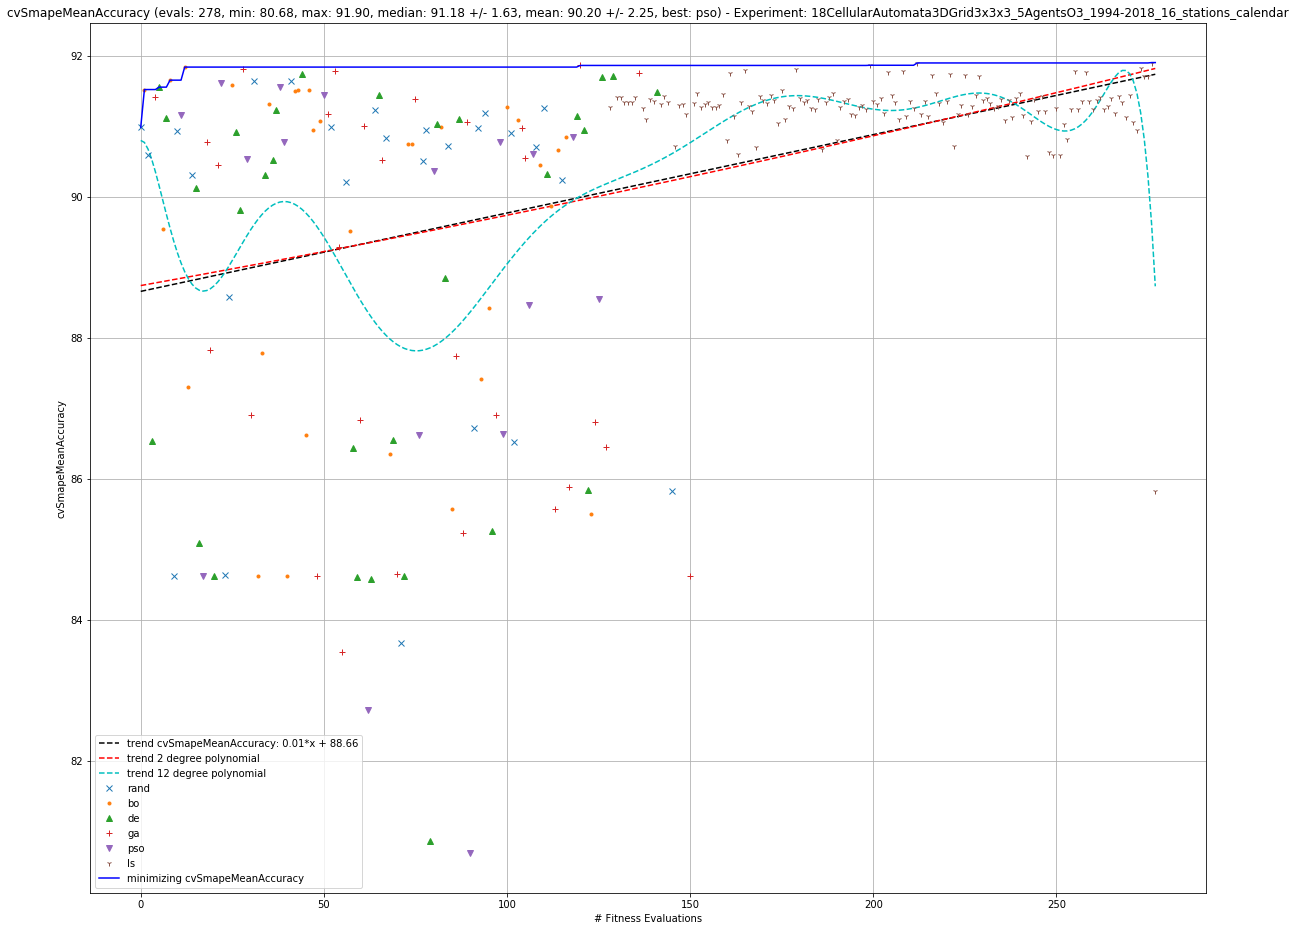

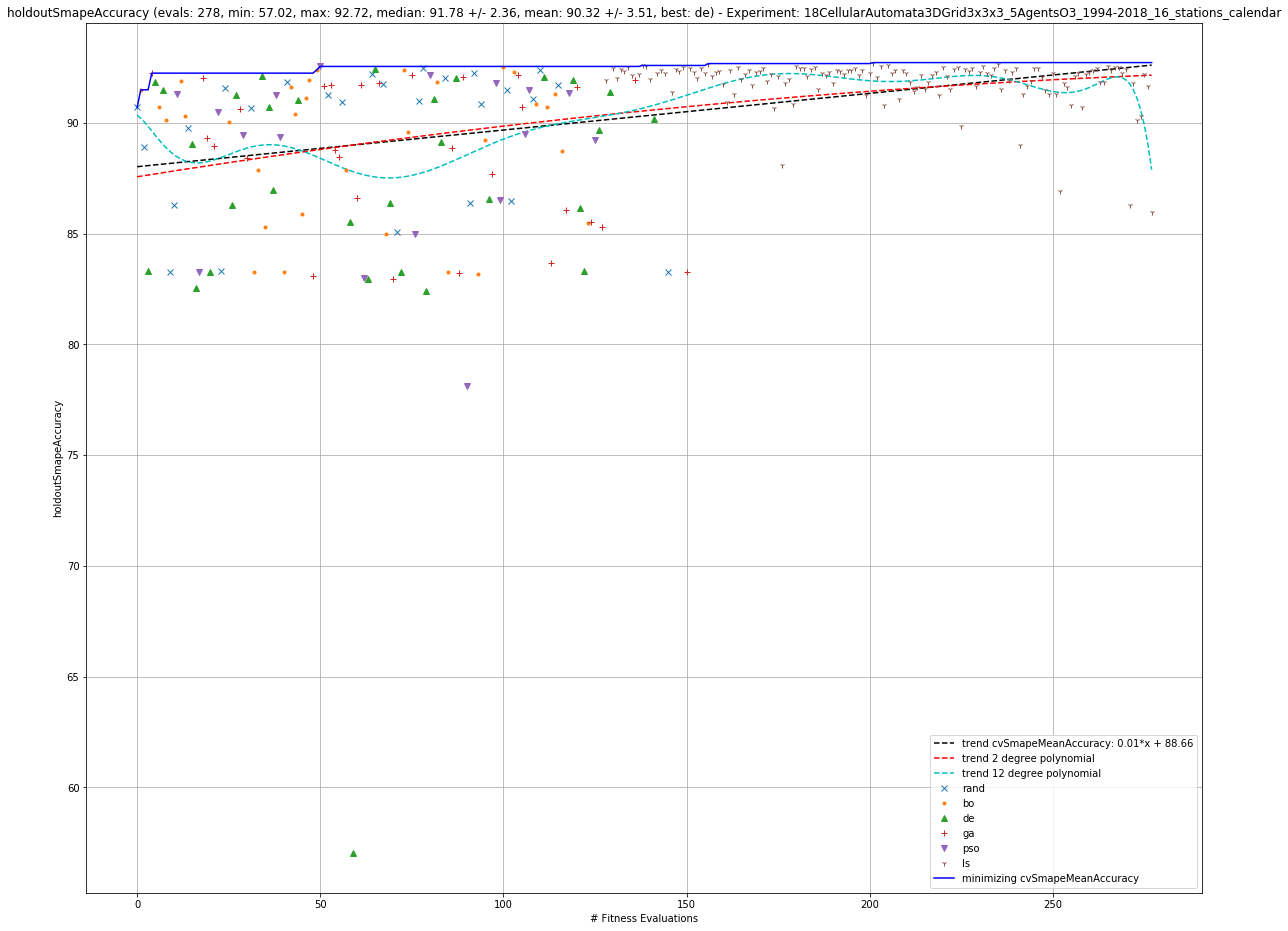

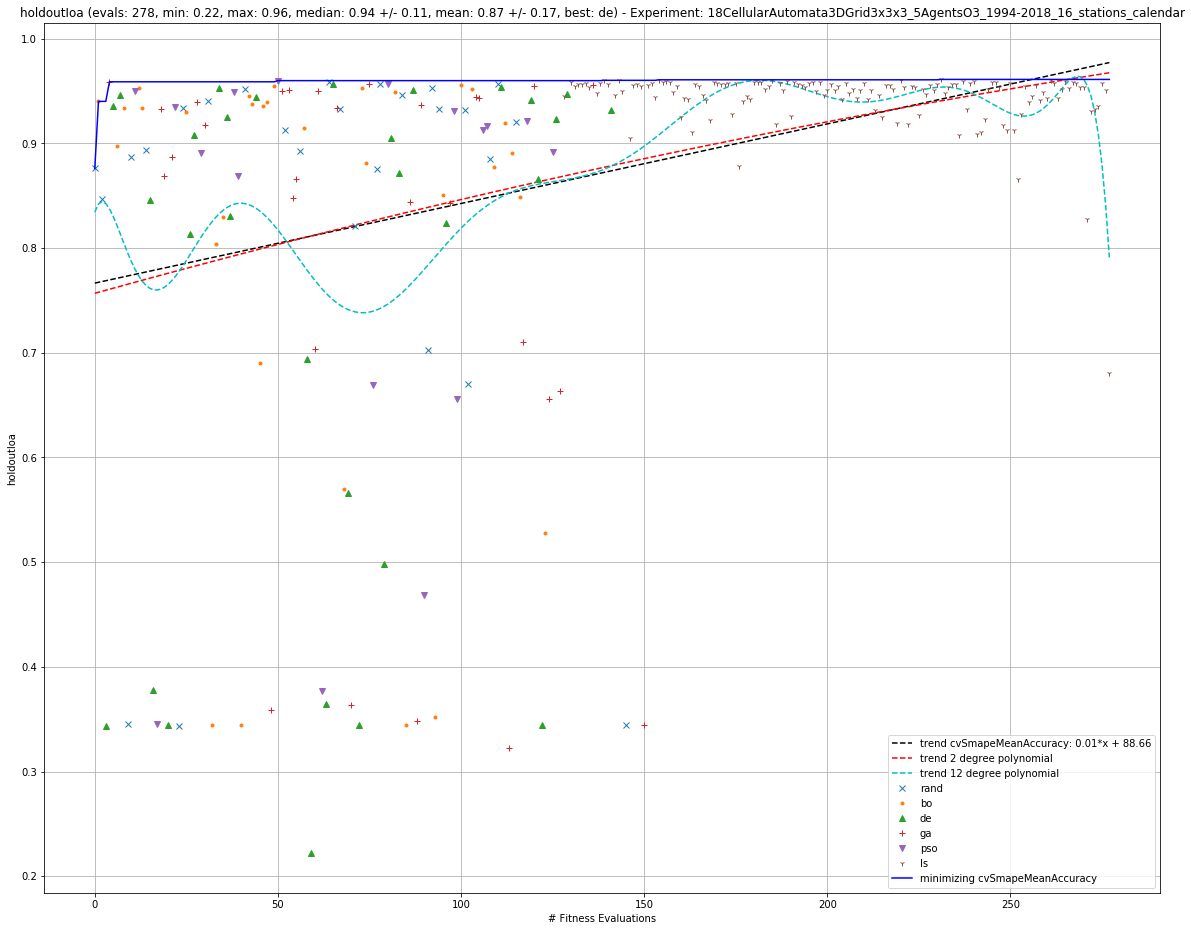

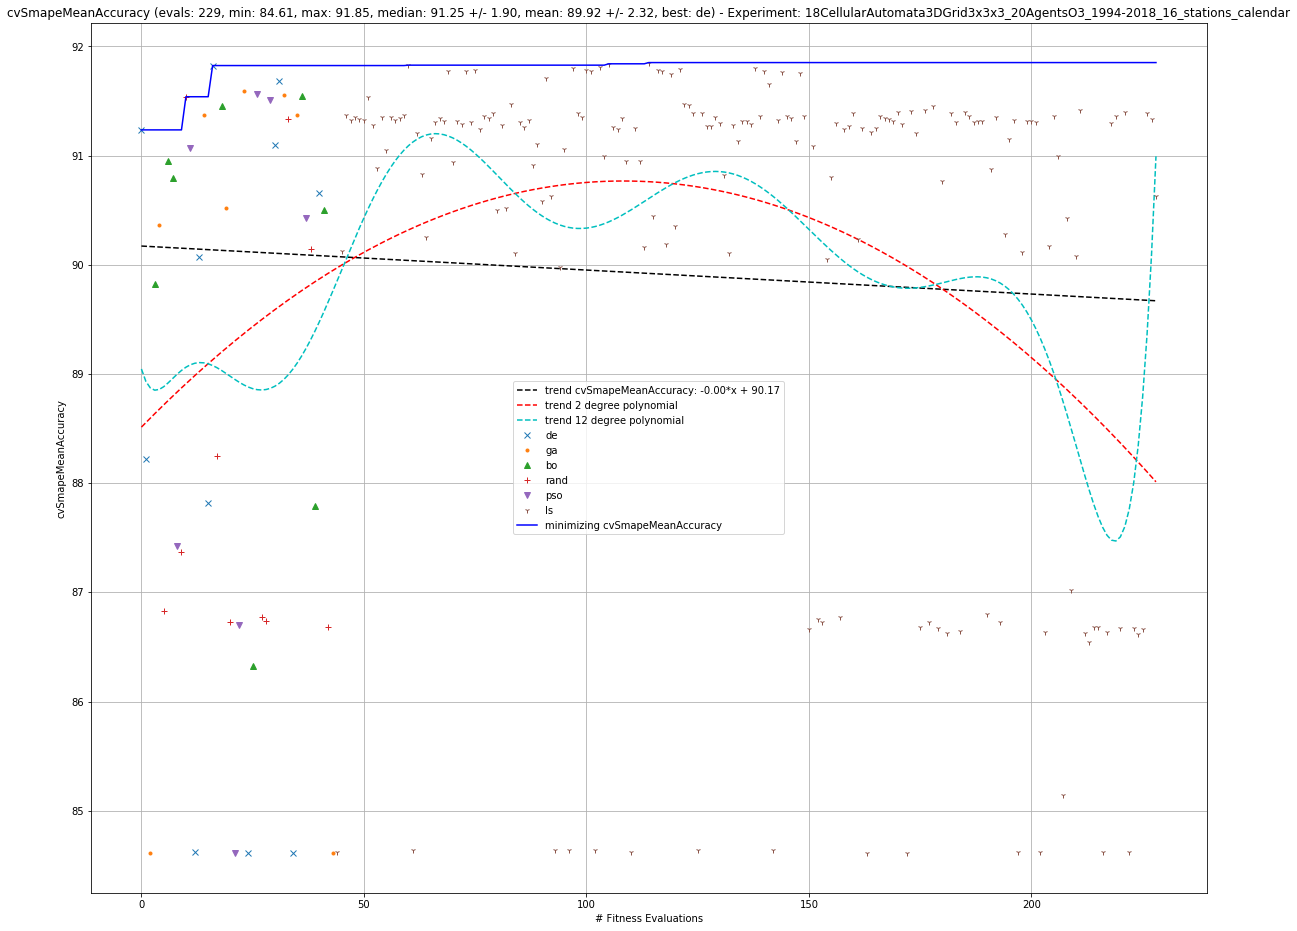

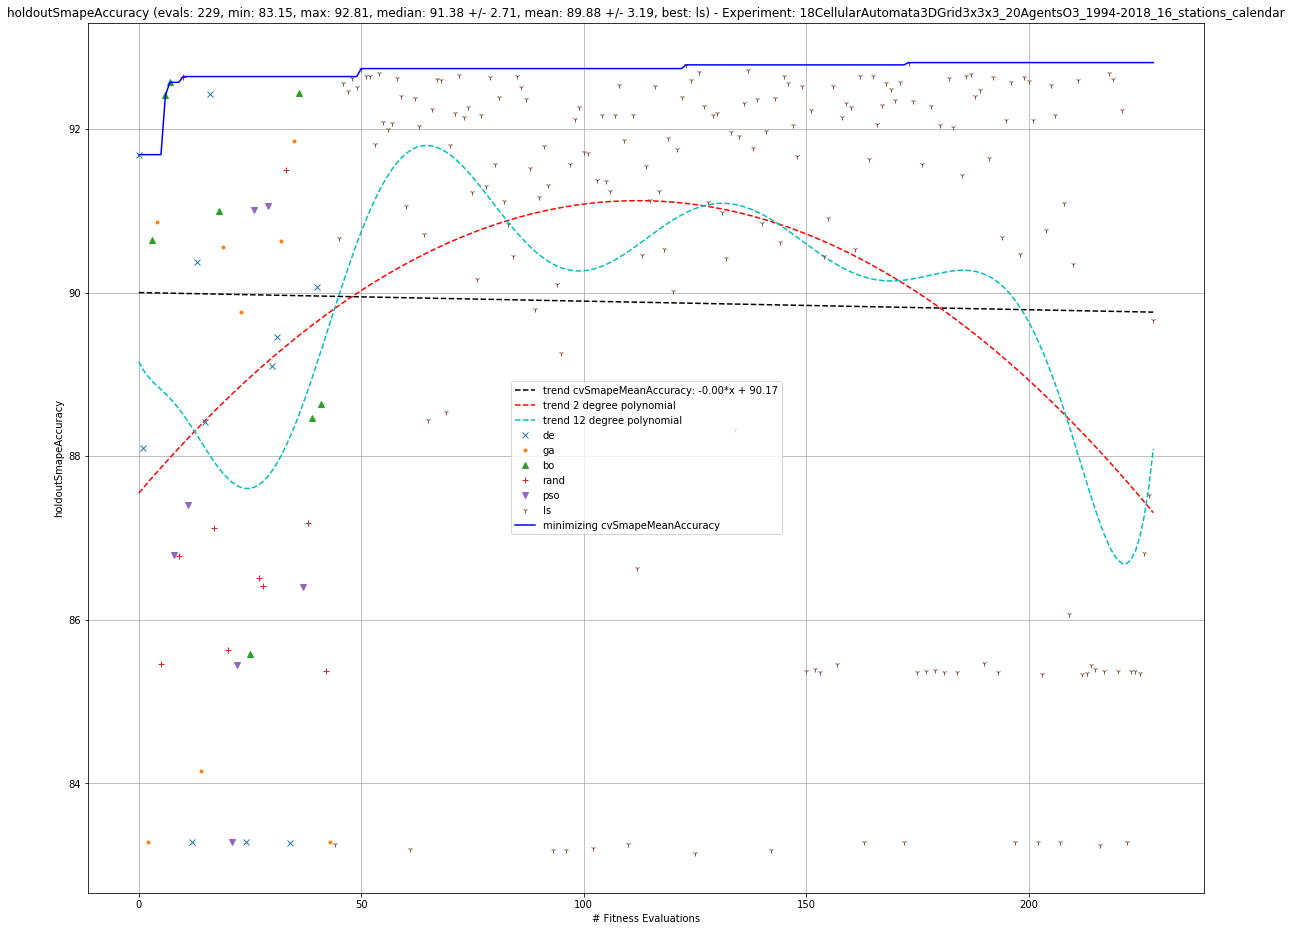

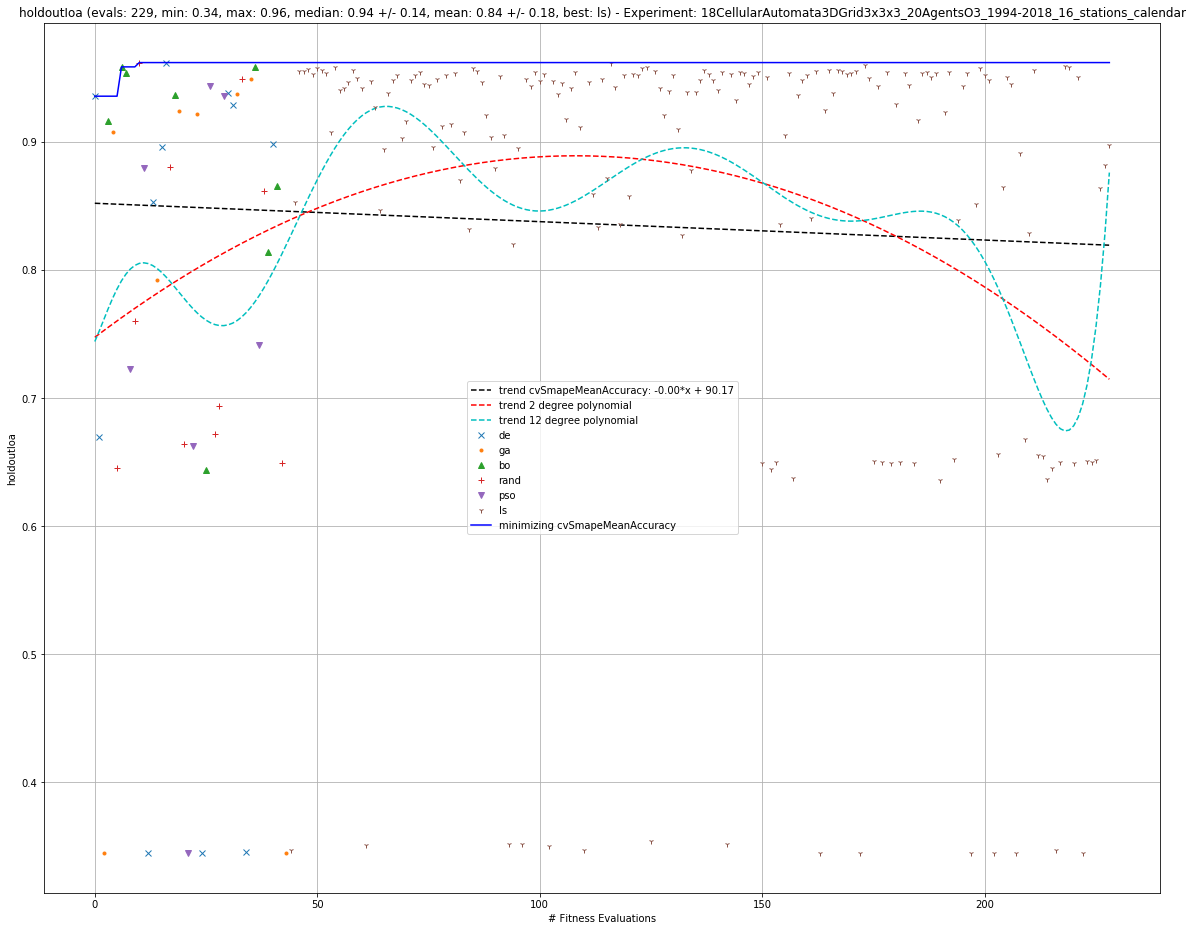

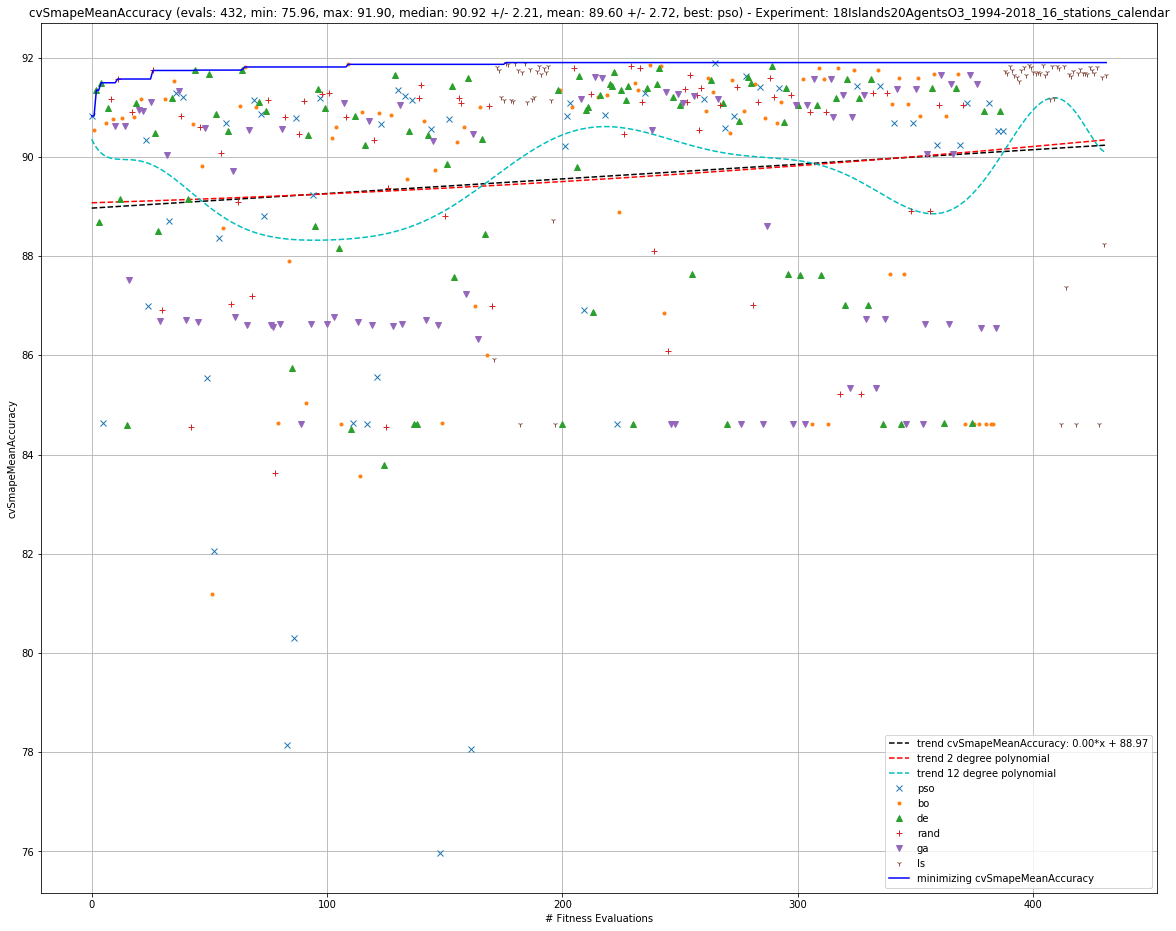

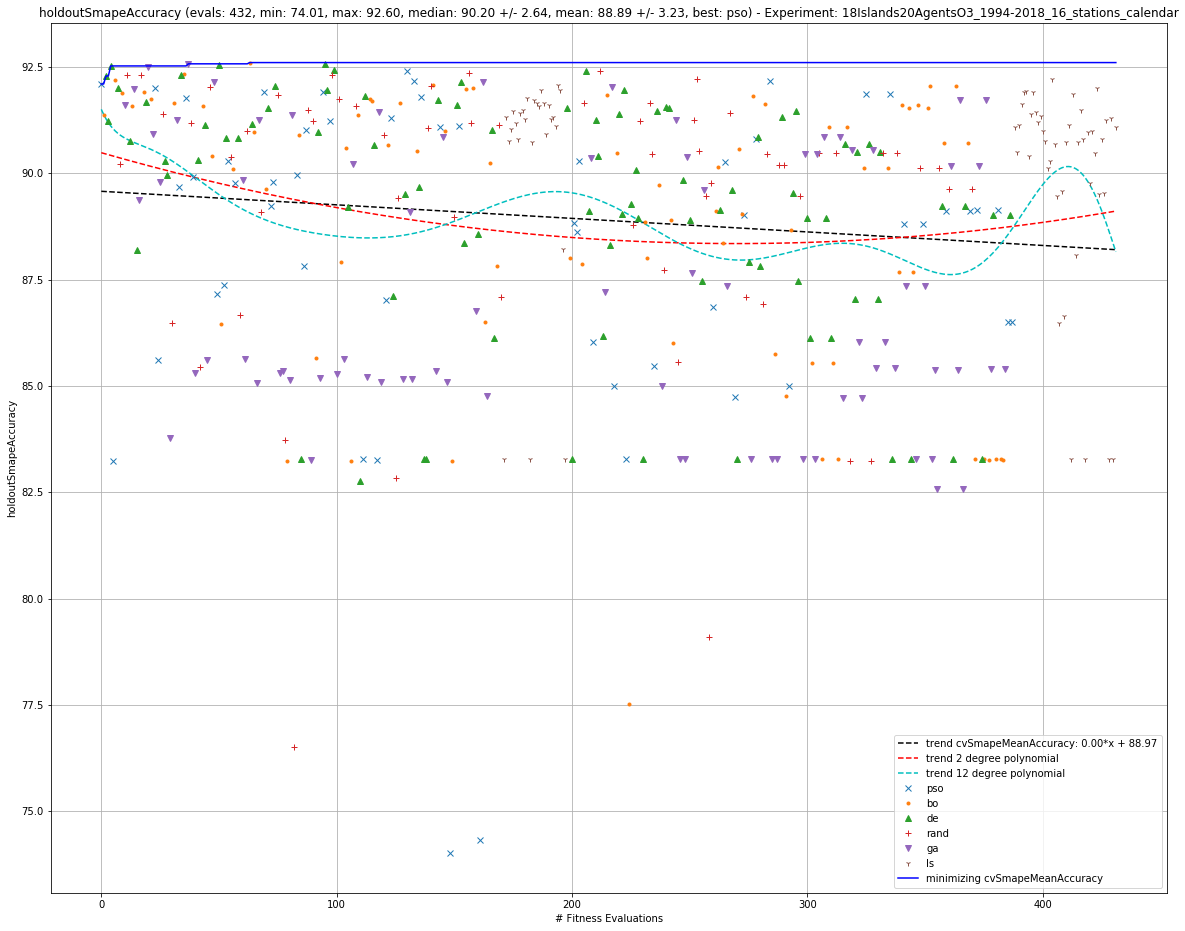

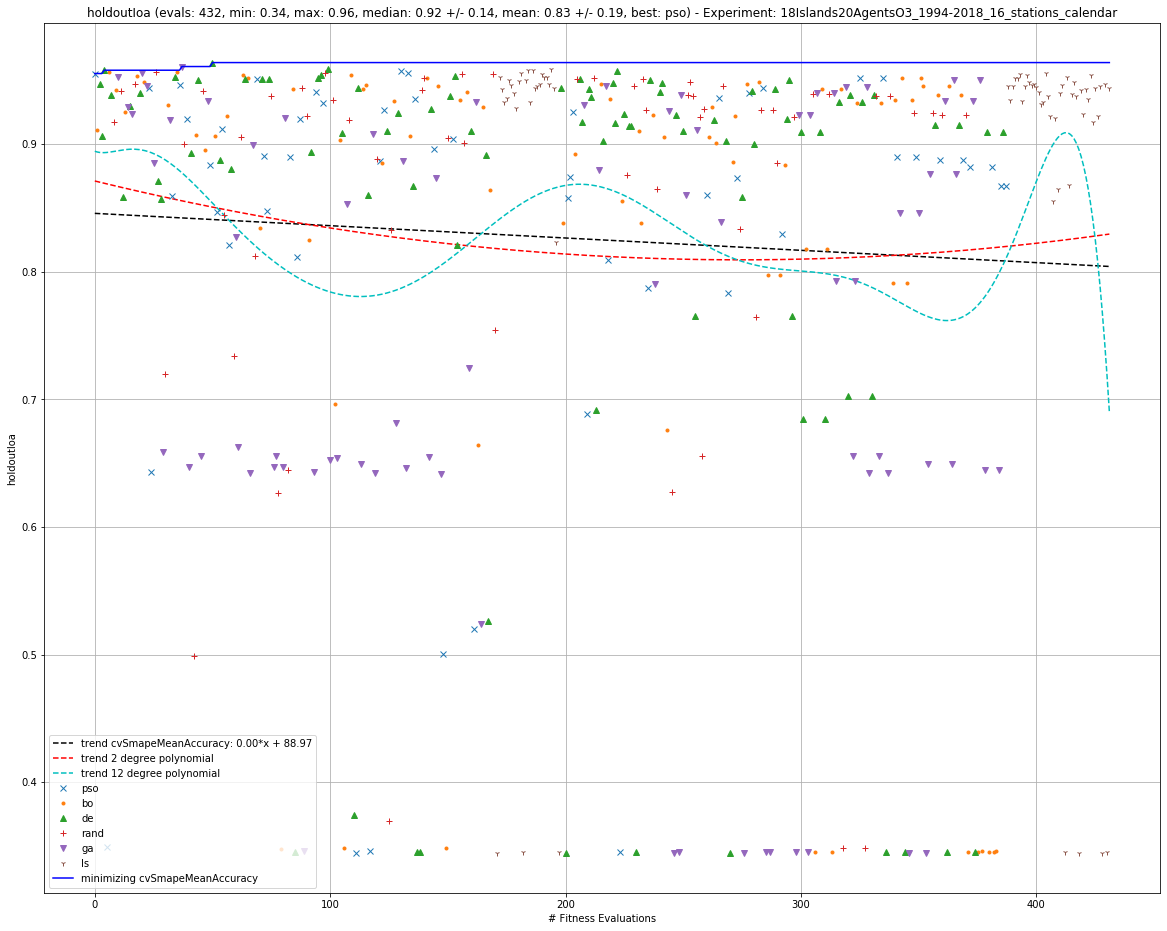

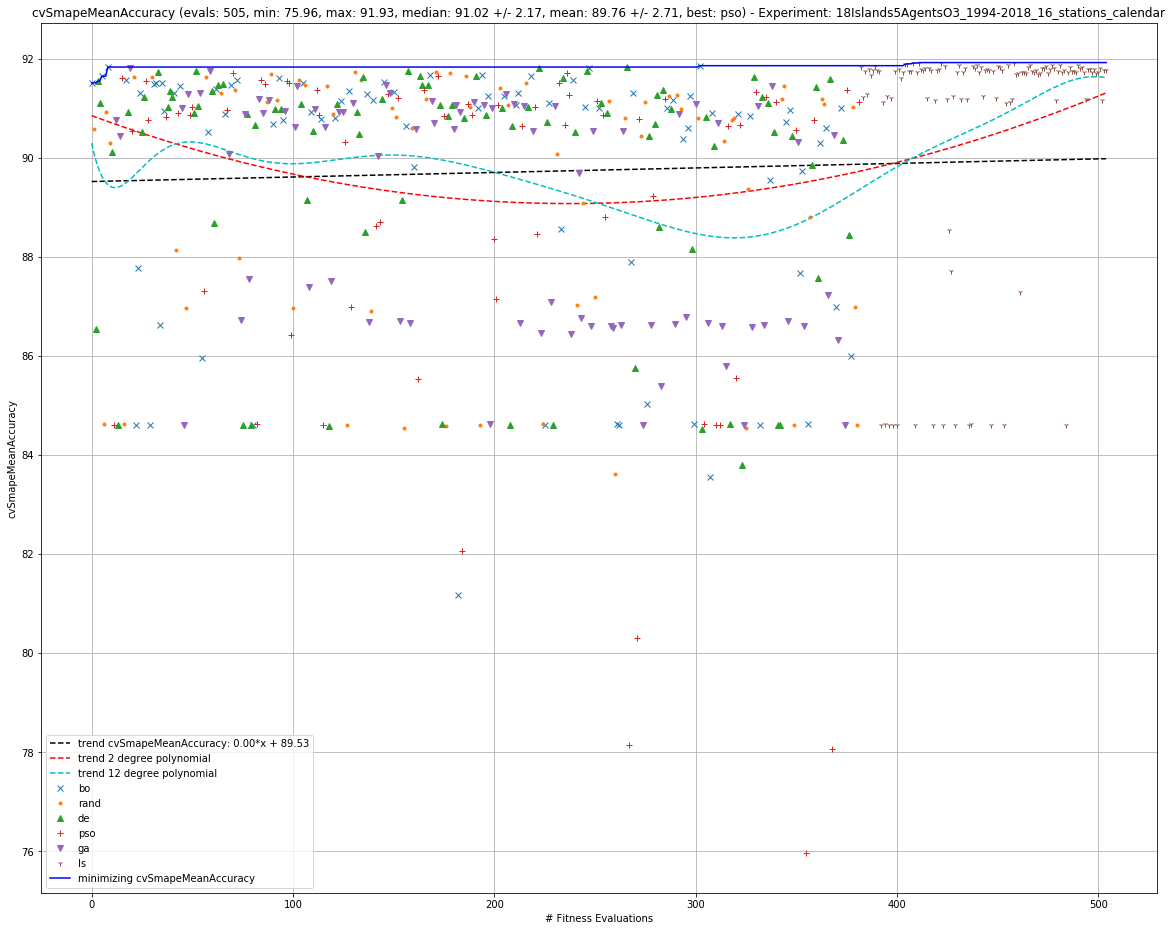

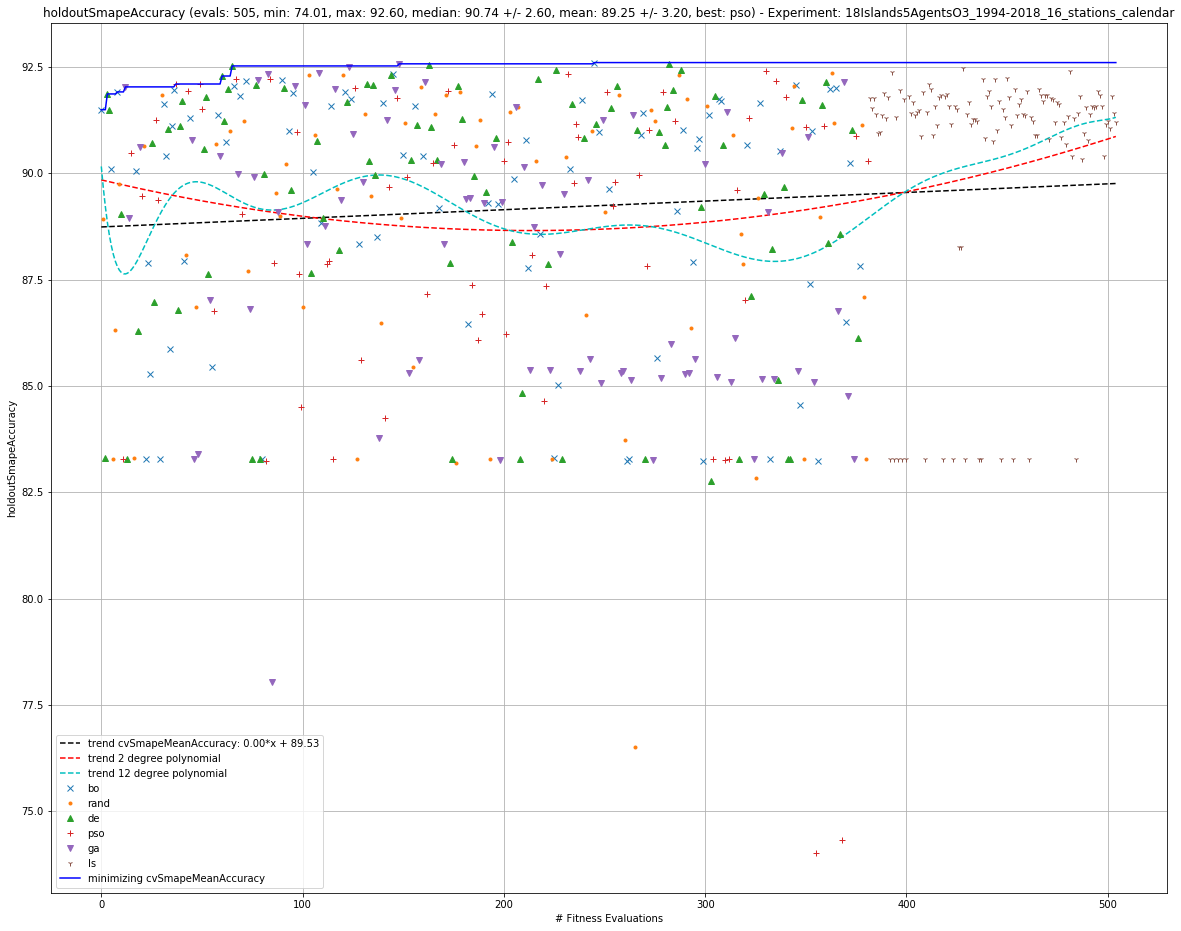

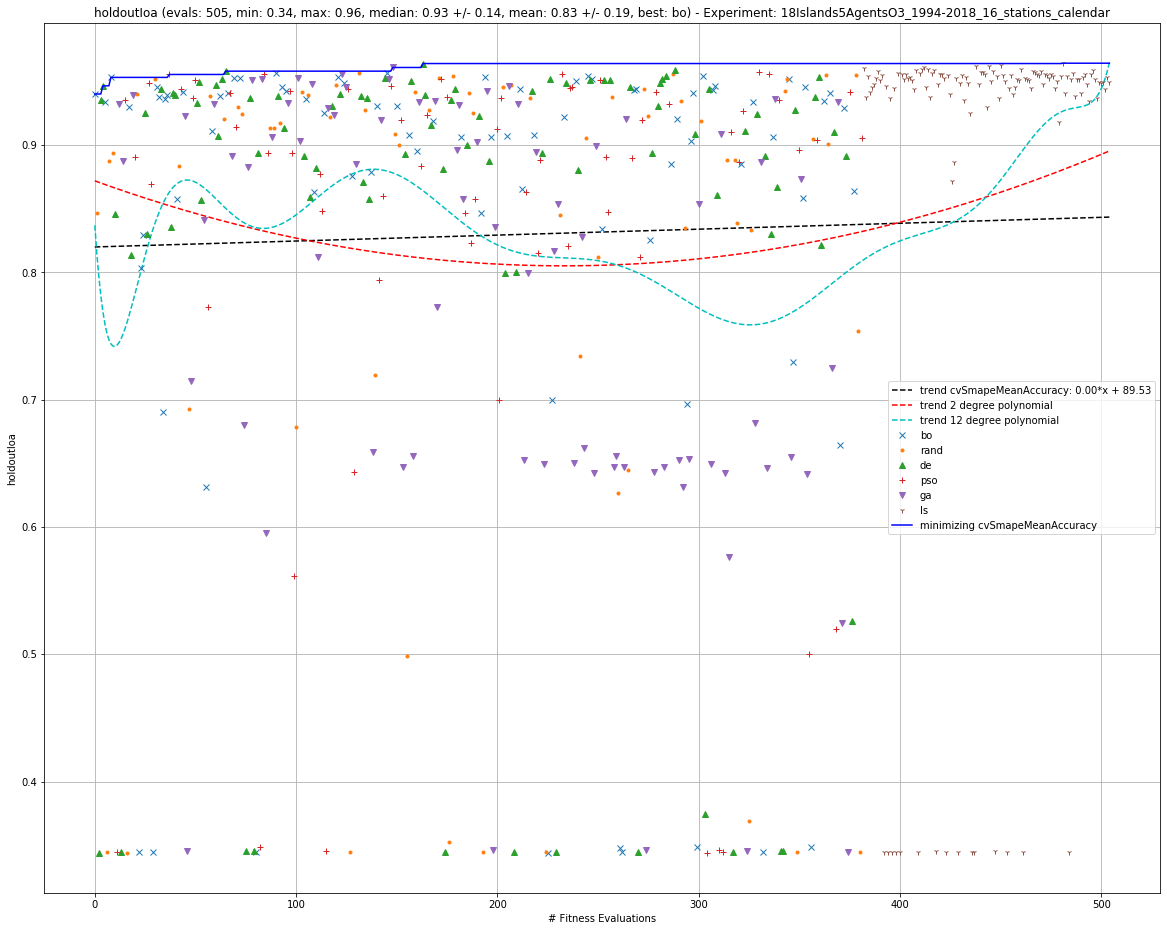

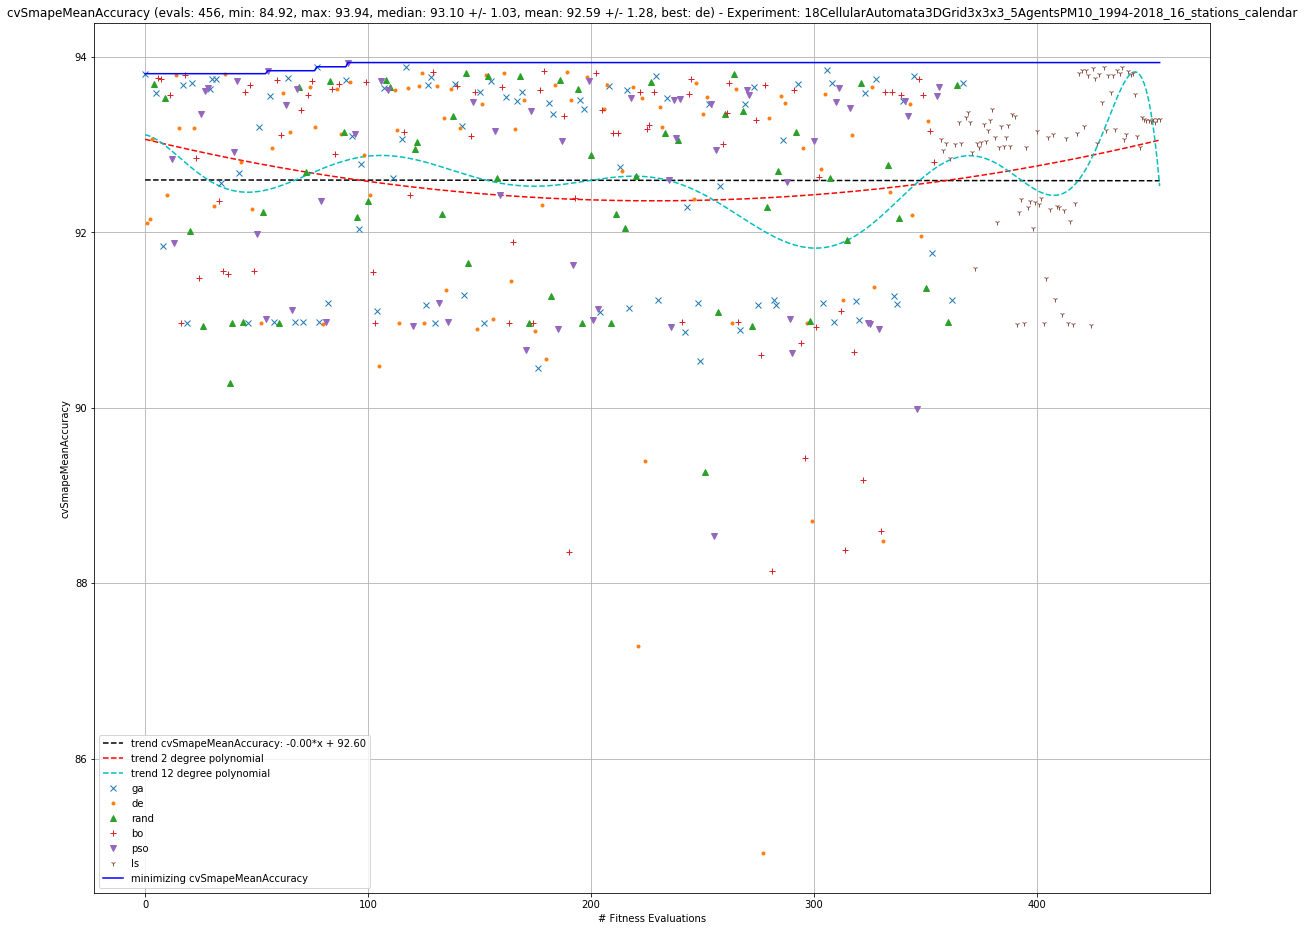

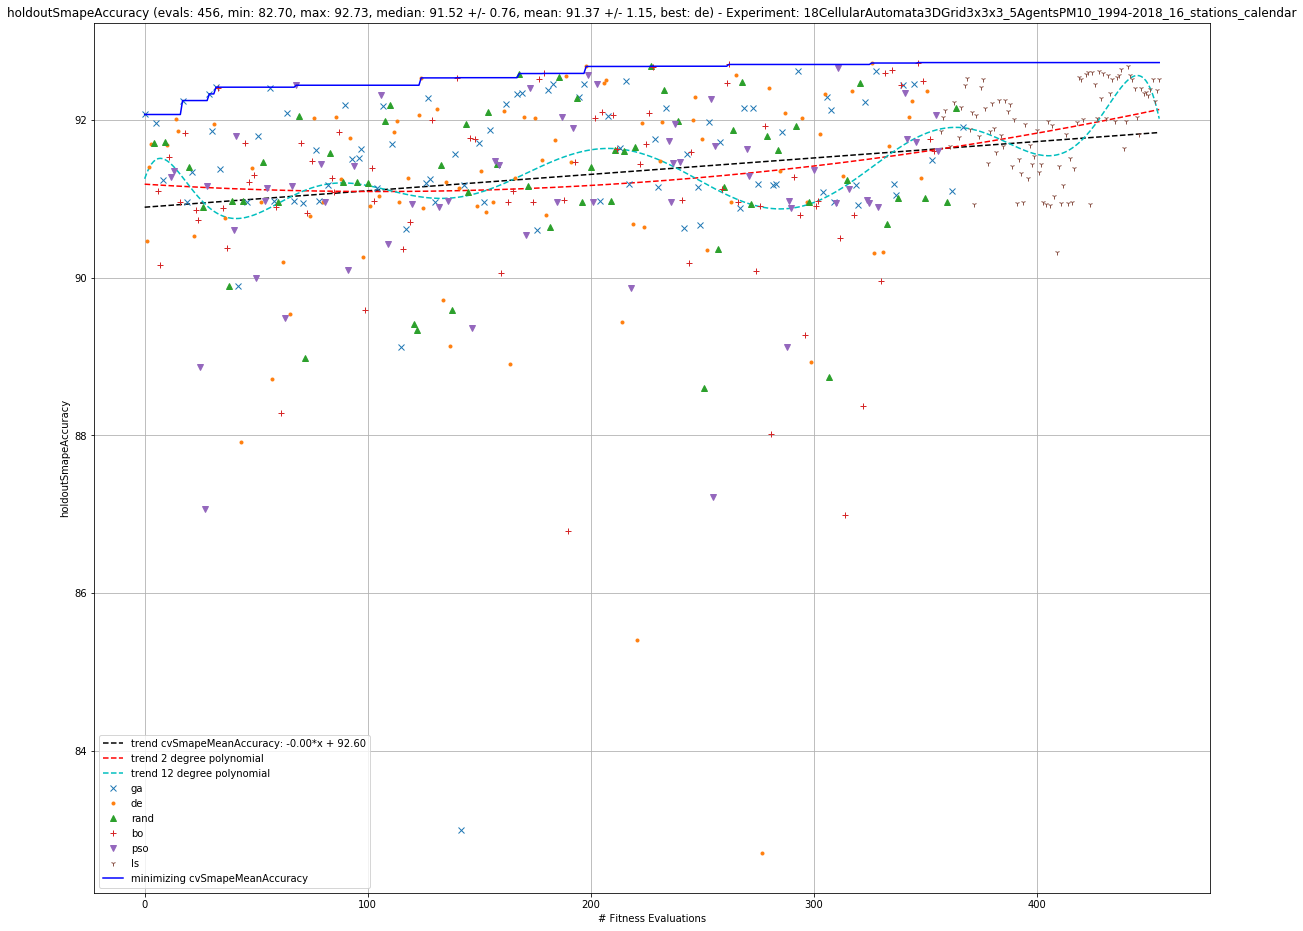

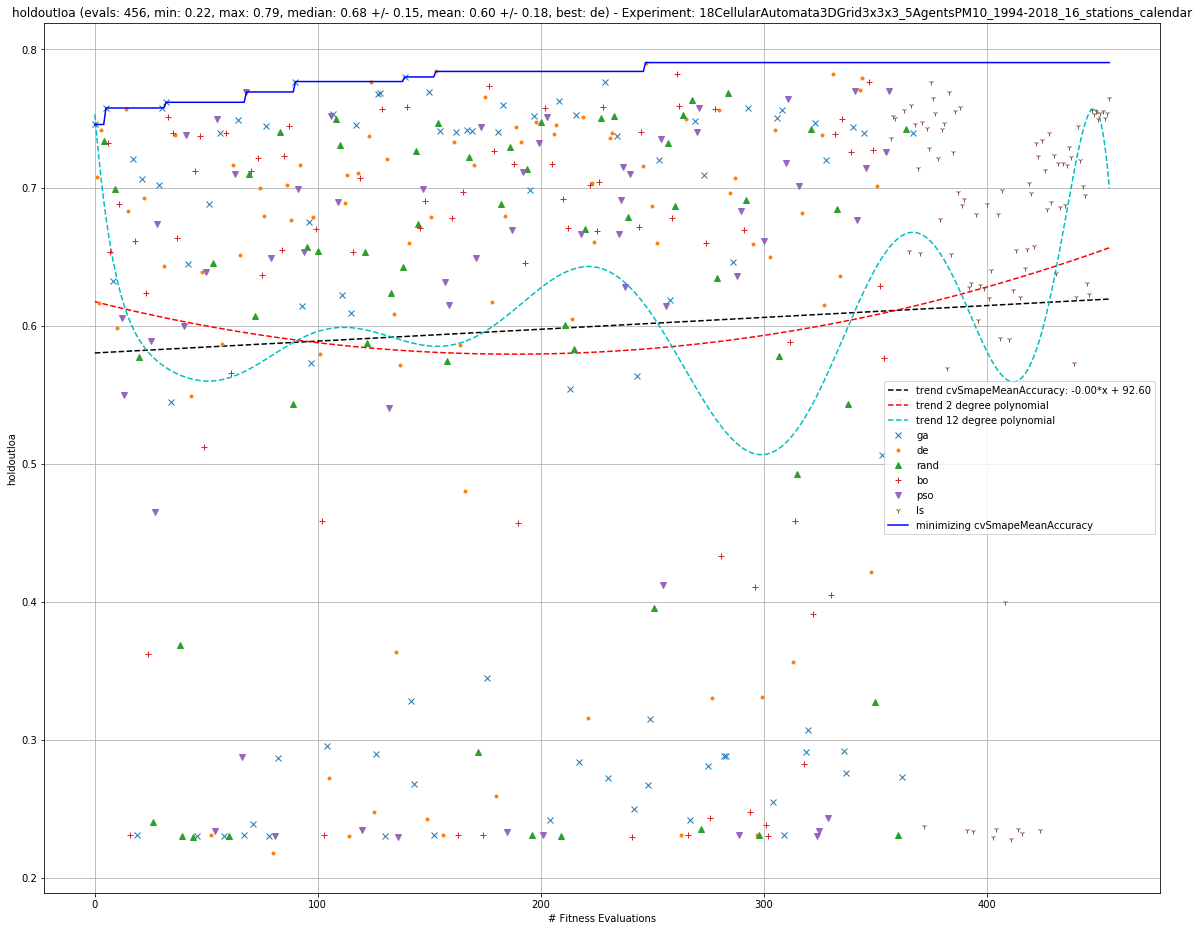

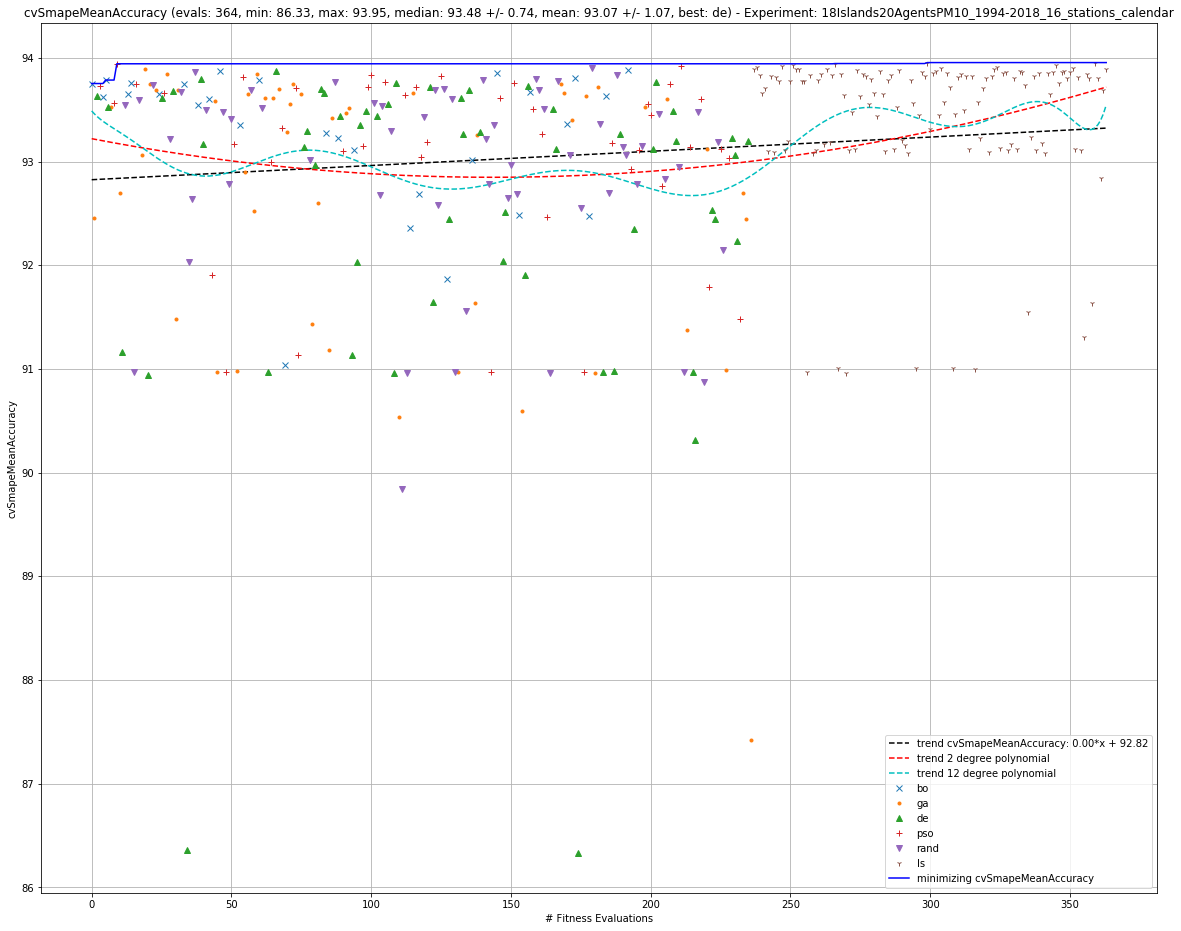

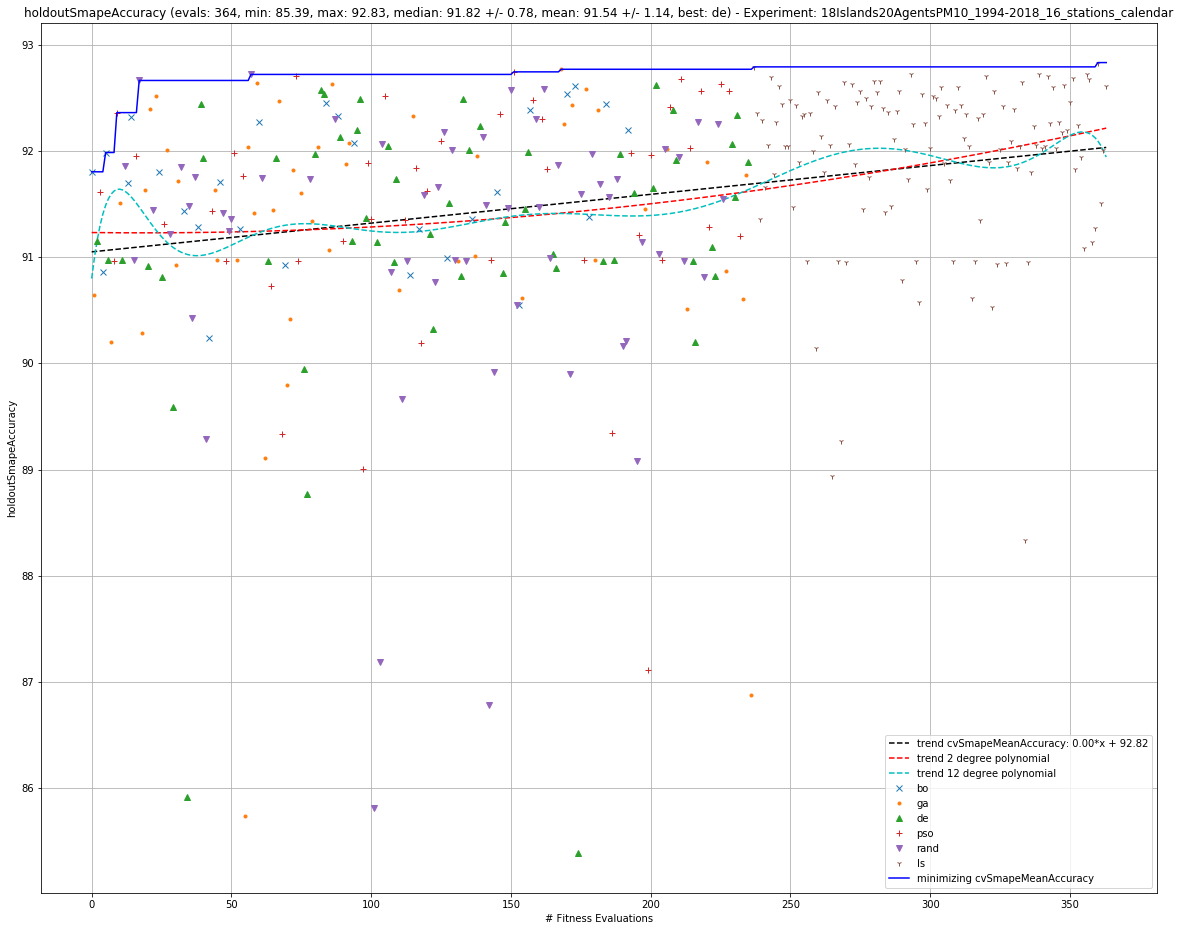

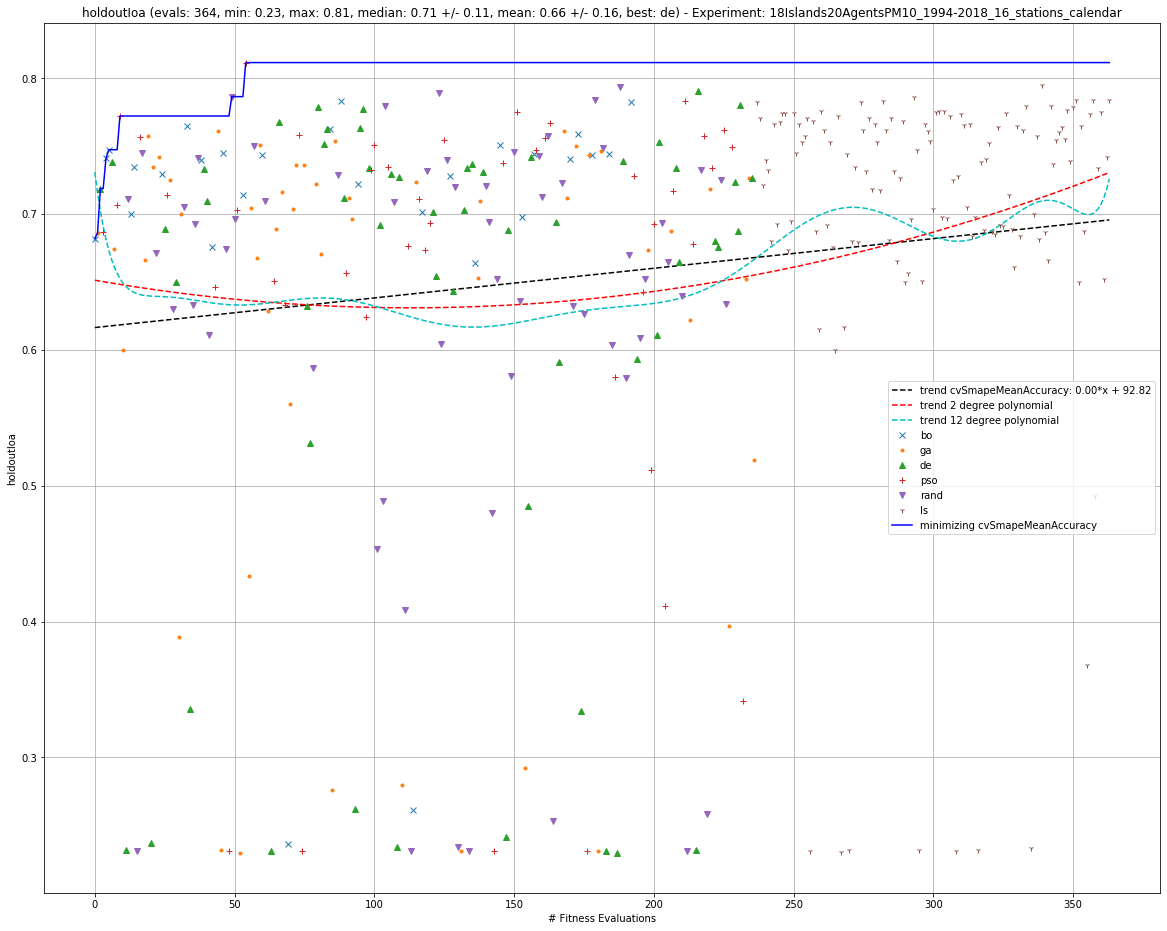

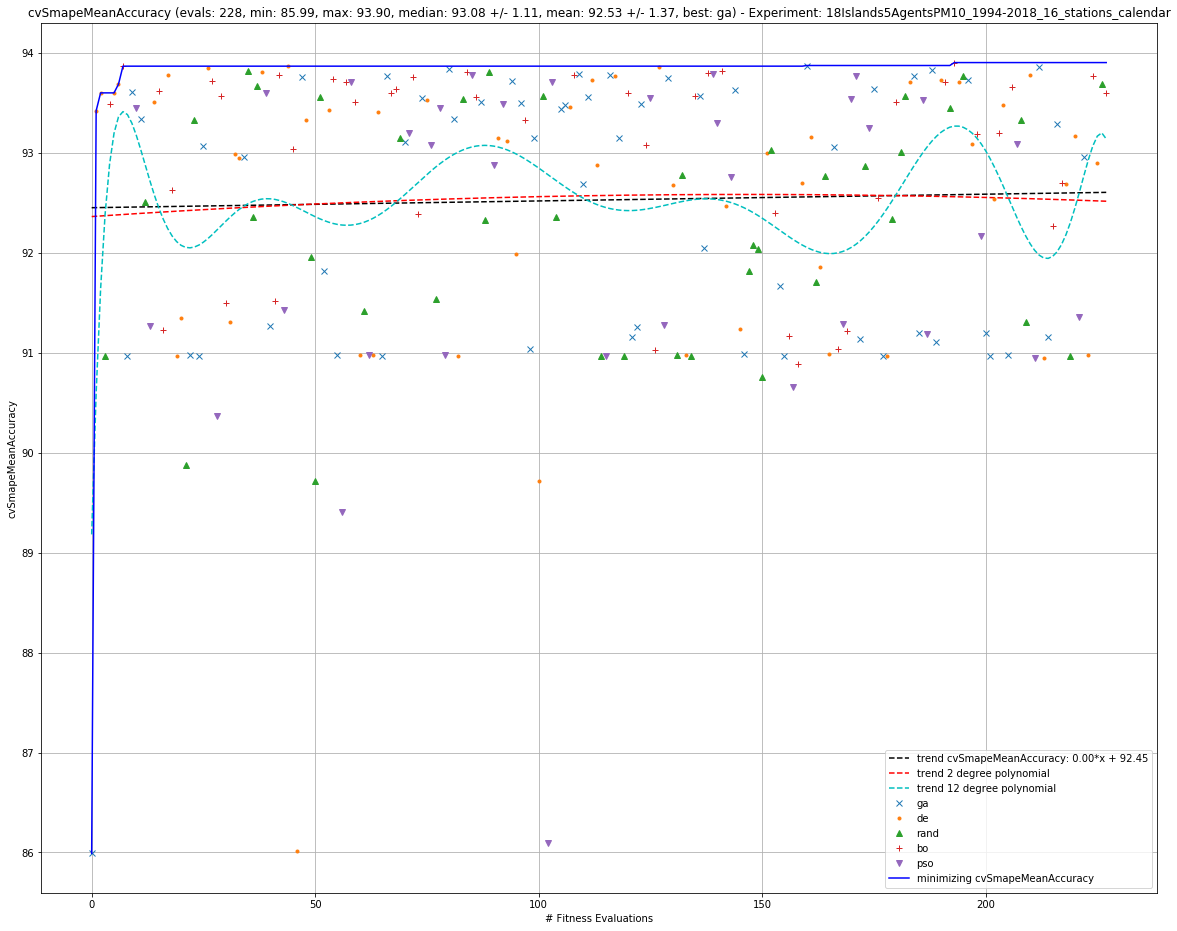

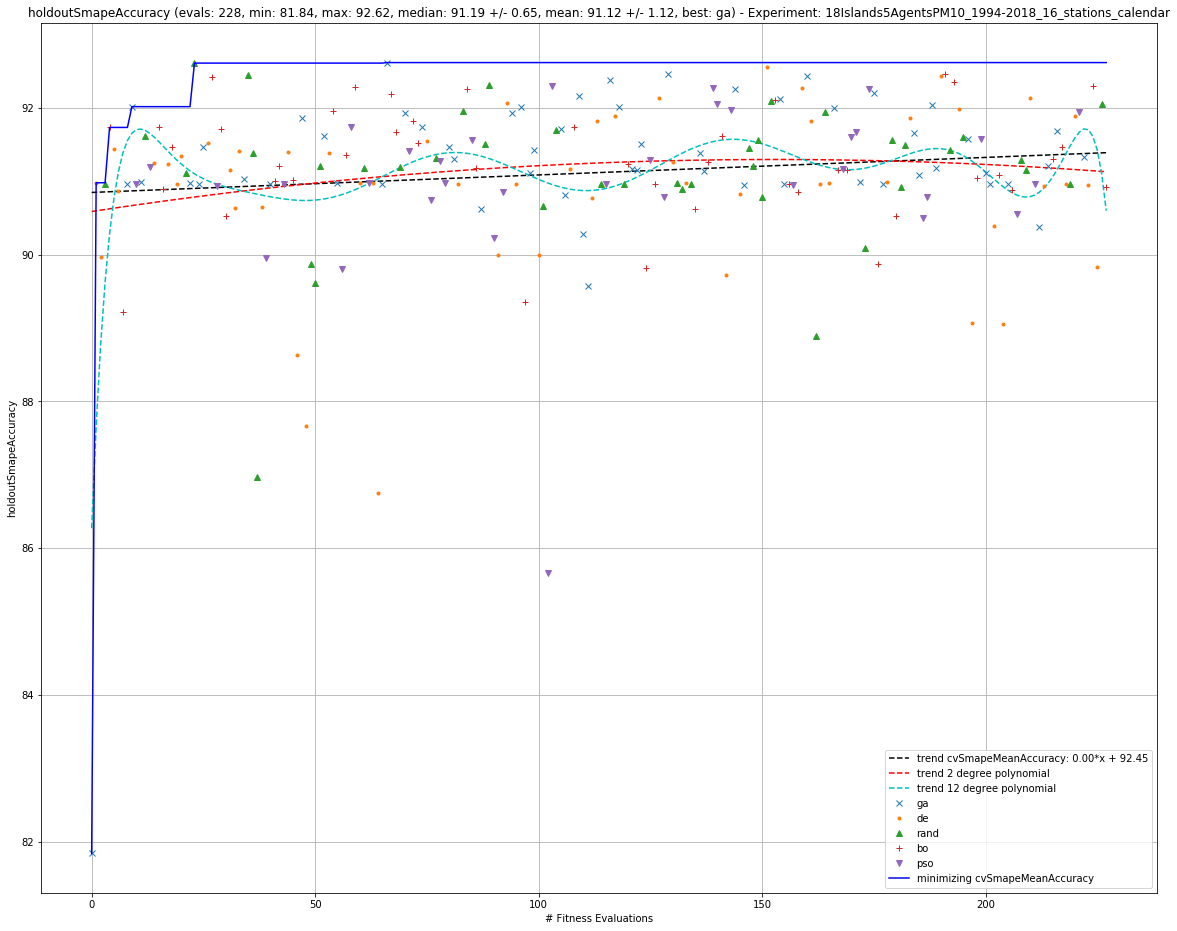

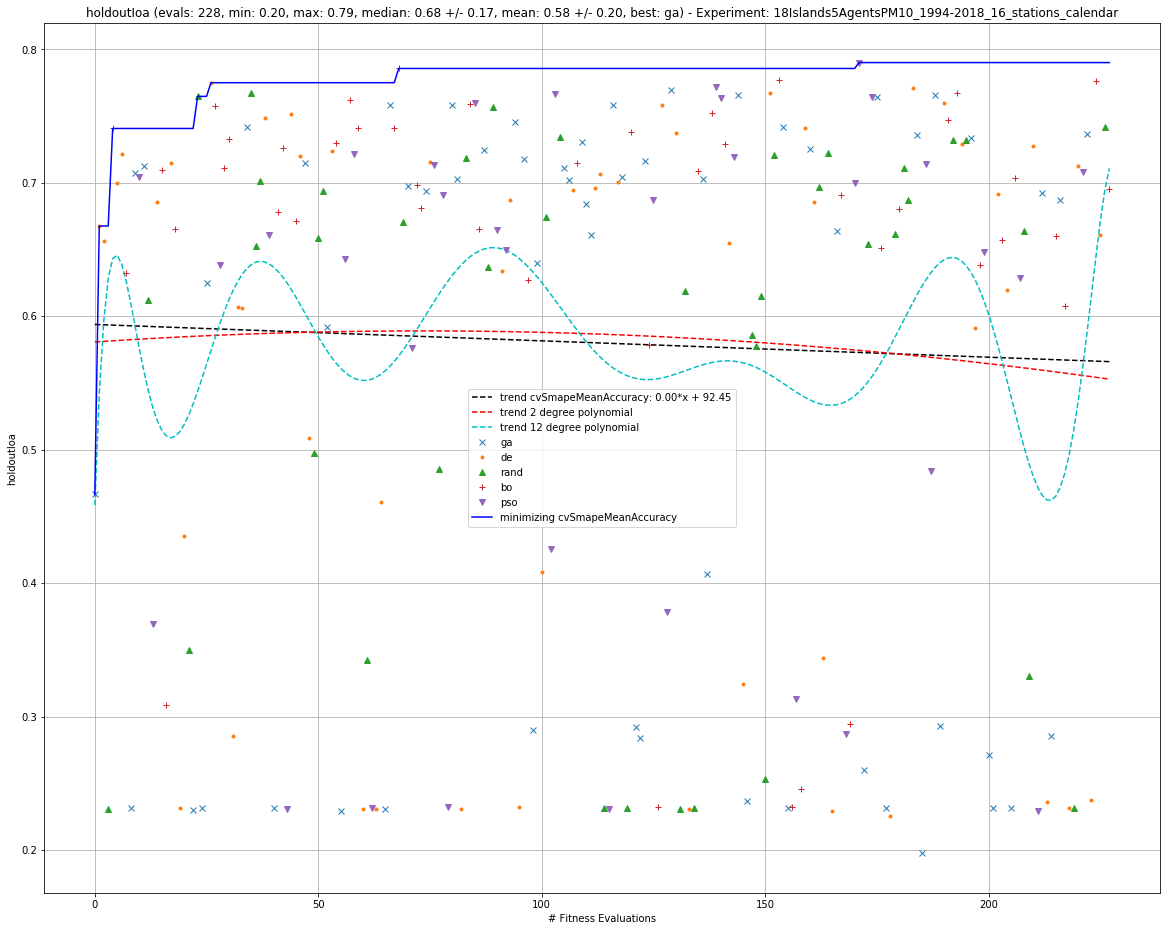

In [82]:
import numpy as np
import matplotlib.pyplot as plt

variables = [
    "cvSmapeMeanAccuracy", 
#     "holdoutMse",
    "holdoutSmapeAccuracy",
    "holdoutIoa"
]
figure_size = [20, 16]
remove_outliers = False
outlier_std = 3
minimizing = False

def getMinimizingMaximizingArray(k, minimizing=True):
    minsArray = []
    minValue = k[0]
    for value in np.array(k):
        if minimizing:
            if value < minValue:
                minValue = value
        else:
            if value > minValue:
                minValue = value
        minsArray.append(minValue)    
    return np.array(minsArray)
    
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

for current_experiment in experiment_directories:
    
    legends = []
    for variable in variables:    
       
        df2 = df.loc[df["experiment"] == current_experiment]
        
#         df2 = df2.loc[df2["optimizer"] != "ls"]
        
        df2 = df2.drop_duplicates()
        df2.sort_index(inplace=True)
    
        if remove_outliers:
            df2 = df2[~(np.abs(df2[variable] - df2[variable].mean()) > (outlier_std * df2[variable].std()))]
    
        dict_points = {}        
        for optimizer in df2["optimizer"].unique():
            dict_points[optimizer + "_y"] = []
            dict_points[optimizer + "_x"] = []
        i = 0
        for index, row in df2.iterrows():
            optimizer = row["optimizer"]
            dict_points[optimizer + "_y"].append(row[variable])
            dict_points[optimizer + "_x"].append(i)            
            i += 1
    
        x = np.array(range(0, len(df2[variable])))
        y = df2[variable].values 
        
        fig, ax = plt.subplots(1, 1, figsize=figure_size)
        ax.set_ylabel(variable)
        ax.set_xlabel('# Fitness Evaluations')

        # Linear regression trend
        z = np.polyfit(x, y, 1) 
        trendpoly1d = np.poly1d(z)
        ax.plot(x, trendpoly1d(x) , 'k--')
        legends.append("trend " + variable + ": {:.2f}*x + {:.2f}".format(z[0], z[1]))
        
        z2 = np.polyfit(x, y, 2) 
        trendpoly2d = np.poly1d(z2)
        ax.plot(x, trendpoly2d(x) , 'r--')
        legends.append("trend 2 degree polynomial")
        
        z12 = np.polyfit(x, y, 12) 
        trendpoly12d = np.poly1d(z12)
        ax.plot(x, trendpoly12d(x) , 'c--')
        legends.append("trend 12 degree polynomial")
                
        # Scatter plot all data points based on method    
        i = 0
        styles = ["x", ".", "^", "+", "v", "1", "*"]
        for optimizer in df2["optimizer"].unique():
            ax.plot(dict_points[optimizer + "_x"], dict_points[optimizer + "_y"], styles[i]);
            legends.append(optimizer)
            i += 1

        ax.plot(x, getMinimizingMaximizingArray(df2[variable].values, minimizing), "b-");
        legends.append("minimizing " + variable)
        
        ax.legend(legends)
        best_method = df2["optimizer"].loc[df2[variable].idxmin()]
        ax.set_title('{} (evals: {}, min: {:.2f}, max: {:.2f}, median: {:.2f} +/- {:.2f}, mean: {:.2f} +/- {:.2f}, best: {}) - Experiment: {}'
                     .format(variable, len(df2[variable]), df2[variable].min(), df2[variable].max(), df2[variable].median(), df2[variable].mad(), 
                             df2[variable].mean(), df2[variable].std(), best_method, current_experiment))
        ax.grid(True) 
    
#         break
#     break

In [190]:
# TODO: test bound scaling for DEAP tester functions
bounds = [(7, 1 * 31),  # batch_size (~ #days: week, month, year)
          (350, 600),  # epoch_size
          (0, 4),  # optimizer
          (64, 512),  # units
          (64, 512),
          (64, 512),
          (0.01, 0.25),  # dropout
          (0.01, 0.25),
          (0.01, 0.25),
          (0.01, 0.25),  # recurrent_dropout
          (0.01, 0.25),
          (0.01, 0.25),
          (0.1, 0.5),  # gaussian noise std
          (0.1, 0.5),
          (0.1, 0.5),
          (0, 1),  # batch normalization layers
          (0, 1),
          (0, 1),
          (0, 1),  # gaussian noise layer layers
          (0, 1),
          (0, 1),
          (0, 5),  # base layer types (plain/bidirectional: LSTM, GRU, Simple RNN)
          (0, 5),
          (0, 5),
          (0, 9),  # layer initializers, normal/uniform he/lecun,...
          (0, 9),
          (0, 9)
          ]

# TODO: minmaxscaling for the Deap benchmark functions
from deap import benchmarks  # TODO: test functions
from sklearn.preprocessing import MinMaxScaler

x = [234, 1234, 1234, 5, 0, 9, 4.5]
function_x_range = [-100, 100]
last_genes_count = -4

scaler = MinMaxScaler(feature_range=function_x_range)

scaler.fit(list(zip(*bounds[last_genes_count:])) )

scaled_x = scaler.transform([x[last_genes_count:]])

print("x[last_genes_count:]: {}".format(x[last_genes_count:]))
print("scaled_x: {}".format(scaled_x))

dict_test_fitness_functions = {
    "himmelblau": { "range": [-6, 6], "function_call": benchmarks.himmelblau },
    "ackley": { "range": [-15, 30], "function_call": benchmarks.ackley },   
    "bohachevsky": { "range": [-100, 100], "function_call": benchmarks.bohachevsky },
    "griewank": { "range": [-600, 600], "function_call": benchmarks.griewank },   
    "h1": { "range": [-100, 100], "function_call": benchmarks.h1 },
    "rastrigin": { "range": [-100, 100], "function_call": benchmarks.rastrigin },       
    "rosenbrock": { "range": [-100, 100], "function_call": benchmarks.rosenbrock },    
    "schaffer": { "range": [-100, 100], "function_call": benchmarks.schaffer },   
    "schwefel": { "range": [-500, 500], "function_call": benchmarks.schwefel }    
}

for test_fitness_function in dict_test_fitness_functions.keys():
    print("call2: ", dict_test_fitness_functions[test_fitness_function]["function_call"], 
    dict_test_fitness_functions[test_fitness_function]["function_call"](scaled_x[0])[0])

print()
scaled_x[0] = [0, 0, 0, 0]
for test_fitness_function in dict_test_fitness_functions.keys():
    print("call2: ", dict_test_fitness_functions[test_fitness_function]["function_call"], 
    dict_test_fitness_functions[test_fitness_function]["function_call"](scaled_x[0])[0])


x[last_genes_count:]: [5, 0, 9, 4.5]
scaled_x: [[ 100. -100.  100.    0.]]
call2:  <function himmelblau at 0x00000186C04A3158> 199660970.0
call2:  <function ackley at 0x00000186C0481C80> 19.999999399063043
call2:  <function bohachevsky at 0x00000186C0481D08> 70000.0
call2:  <function griewank at 0x00000186C0481D90> 8.508033579758386
call2:  <function h1 at 0x00000186C0481BF8> 0.0036549041823314013
call2:  <function rastrigin at 0x00000186C0481E18> 30000.0
call2:  <function rosenbrock at 0x00000186C0481B70> 30002029803.0
call2:  <function schaffer at 0x00000186C04A3048> 38.90049353583164
call2:  <function schwefel at 0x00000186C04A30D0> 1730.3336601786727

call2:  <function himmelblau at 0x00000186C04A3158> 170.0
call2:  <function ackley at 0x00000186C0481C80> 0.0
call2:  <function bohachevsky at 0x00000186C0481D08> 0.0
call2:  <function griewank at 0x00000186C0481D90> 0.0
call2:  <function h1 at 0x00000186C0481BF8> 0.0
call2:  <function rastrigin at 0x00000186C0481E18> 0.0
call2:  <fun